# Day 8

## Part 1

In [ ]:
f = open("./data/input8.txt", "r")
c = f.readlines()


In [ ]:
import pandas as pd
df = pd.DataFrame(c)
    

In [ ]:
tmp = df[0].str.split('|').apply(pd.Series)
input = tmp[0]
output = tmp[1]

In [ ]:
input = input.str.split(' ').apply(pd.Series).drop(10, axis=1)
output = output.str.split(' ').apply(pd.Series).drop(0, axis=1)
output[4] = output[4].str.replace('\n','')

In [ ]:
res = []
for col in input.columns:
    res.append(input[col].str.len())
lengths = pd.concat(res, axis=1)

In [ ]:
4 - has length 4
1 - has length 2
7 - has length 3
8 - has length 7

In [ ]:
res = []
for col in output.columns:
    res.append(output[col].str.len())
output_lengths = pd.concat(res, axis=1)

In [ ]:
(output_lengths==4).sum().sum() + (output_lengths==2).sum().sum() +  (output_lengths==3).sum().sum() +  (output_lengths==7).sum().sum()

## Part 2

In [ ]:
def get_digit(dict, str):
   
    if len(str) == 5:
        if len(set(dict[1])&set(str))==2:
            dict[3] = str
        elif len(set(dict[4])& set(str))==3:
            dict[5] = str
        else:
            dict[2]=str
        return dict
    elif len(str) == 6:
        if len(set(dict[7])& set(str))==2:
            dict[6] = str
        elif len(set(dict[4])&set(str))==4:
            dict[9]=str
        else:
            dict[0]=str
        return dict
    else:
        return dict

        
        

In [ ]:
def find_digits(vv):
    dict = {}
    dict[1] = [x for x in vv if len(x)==2][0]
    dict[4] = [x for x in vv if len(x)==4][0]
    dict[7] = [x for x in vv if len(x)==3][0]
    dict[8] = [x for x in vv if len(x)==7][0]

    for v in vv:
        digits = get_digit(dict, v)
    return digits

digit_finder = lambda x: int(''.join([str(inv_dig[''.join(sorted(y))]) for y in x]))


In [ ]:
import numpy as np
final_arr = []
for i in np.arange(input.shape[0]):
    digits = find_digits(input.loc[i].to_list())
    inv_dig = {''.join(sorted(v)): k for k, v in digits.items()}
    number = digit_finder(output.loc[i].to_list())
    final_arr.append(number)

In [ ]:
np.array(final_arr).sum()


# Day 9

## Part 1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
f = open("./data/input9.txt", "r")
c = f.readlines()
df = pd.DataFrame(c)
df = df[0].apply(lambda x: list(x)).apply(pd.Series).drop(100, axis=1)
df = df.astype(int)
df_t = df.T



In [ ]:
a = df < df.shift(1).fillna(10)
b = df < df.shift(-1).fillna(10)
c = (df_t < df_t.shift(1).fillna(10)).T
d = (df_t < df_t.shift(-1).fillna(10)).T


In [ ]:
df[(a==True)&(b==True)&(c==True)&(d==True)].sum().sum(), df[(a==True)&(b==True)&(c==True)&(d==True)].count().sum()


In [ ]:
276+224

## Part 2

In [ ]:
arr = df[(a==True)&(b==True)&(c==True)&(d==True)].fillna(999).to_numpy()
low_points = np.where(arr!=999)

In [ ]:
x = low_points[0]
y = low_points[1]
low_points = pd.DataFrame(zip(x,y))

In [ ]:
low_points.shape

In [ ]:
def discover_basin(basin, df, x, y):
    
    # search right
    if df.loc[x,y]==9:
        return basin
    
    if not (x,y) in basin:
        if x>0:
            basin.append((x,y))
            discover_basin(basin, df, x-1, y)
        if x < df.shape[0]-1:
            
            basin.append((x,y))
            discover_basin(basin, df, x+1, y)
        if y>0:
            
            basin.append((x,y))
            discover_basin(basin, df, x, y-1)
        if y < df.shape[1]-1:
            
            basin.append((x,y))
            discover_basin(basin, df, x, y+1)
    return basin    
    
    

In [ ]:
%%timeit
all_basins = []

for _, row in low_points.iterrows():
    basin = []
    res = discover_basin(basin, df, row[0], row[1])
    all_basins.append(len(list(set(res))))

In [ ]:
pd.Series(all_basins).sort_values(ascending=False).head(3)

In [ ]:
100*99*98

# Day 10 

## Part 1

In [ ]:
f = open("./data/input10.txt", "r")
c = f.readlines()
df = pd.DataFrame(c)
df[0] = df[0].str.replace('\n','')

In [ ]:
opening_chars = ["(","<","{","["]
open_close_dict = {"(":")","{":"}","[":"]","<":">"}
error_points = {")":3,"]":57,"}":1197,">":25137}
closing_points = {")":1,"]":2,"}":3,">":4}

In [ ]:
def find_first_bad_closing_only_dict_and_queus_no_pandas(sequence):
    # print(sequence)
    q = []
    for char in sequence:
        if char in opening_chars:
            q.append(char)
        else:
            last  = q.pop(-1)
            if open_close_dict[last]!=char:
                return char

            

In [ ]:
arr = []
for _, row in df.iterrows():
    row = row.values[0]
    arr.append(find_first_bad_closing_only_dict_and_queus_no_pandas(row))

mapped_arr = [error_points[x] if x is not None else 0 for x in arr ]
np.array(mapped_arr).sum()

## Part 2

In [ ]:
incomplete = np.where(np.array(mapped_arr)==0)
print(len(incomplete[0]))
incomplete_df = df.loc[incomplete]
print(incomplete_df.shape)

In [ ]:
def find_open_seqs(sequence):
    # print(sequence)
    q = []
    for char in sequence:
        if char in opening_chars:
            q.append(char)
        else:
            last  = q.pop(-1)
    return q


def fill_in_q(q):
    new_q = []
    while len(q)>0:
        open = q.pop(-1)
        new_q.append(open_close_dict[open])
    return new_q
        

In [ ]:
final_result = []
for _, row in incomplete_df.iterrows():
    row = row.values[0]
    open_q = find_open_seqs(row)
    final_result.append(fill_in_q(open_q))

In [ ]:
def calculate_sequence_score(seq):
    score = 0
    for char in seq:
        score = score * 5
        score += closing_points[char]
    return score
    

In [ ]:
all_scores = [calculate_sequence_score(x) for x in final_result]

In [ ]:
sorted(all_scores)[27]

# Day 11

## Part 1

In [ ]:
f = open("./data/input11.txt", "r")
c = f.readlines()
c = [x.replace("\n","") for x in c]
c = [list(x) for x in c]
df = pd.DataFrame(c).astype("float64")


In [ ]:
def increase_neighbors(arr , x):
    mod_res = np.mod(x,10)
    neighbors = [x+1, x+9, x+10, x+11, x-1, x-11, x-10, x-9]
    # print(neighbors, '\n')
    legal_neighbors = [y for y in neighbors if (y>=0) & (np.mod(y,10) in [mod_res, mod_res-1, mod_res+1])& (y<100)]
    arr[legal_neighbors] +=1
    return arr
    

In [ ]:
arr = df.to_numpy().flatten()
flashes = 0
print(arr.reshape(10,10))
for i in np.arange(100):
    
    # print('step', i)
    arr += 1
    flash_candidate = np.where(arr>9)[0]
    while len(flash_candidate) > 0:
        flashes += len(flash_candidate)
        for x in flash_candidate:
            arr = increase_neighbors(arr , x)
            arr[x]= np.nan
        flash_candidate = np.where(arr>9)[0]
        # print('new_flash', flash_candidate)
    
    arr[np.where(np.isnan(arr))]=0
    # print(flashes)
    # print(f'end of step {i} \n ', arr.reshape(10,10))




In [ ]:
flashes

## Part 2

In [ ]:
arr = df.to_numpy().flatten()
flashes = 0
print(arr.reshape(10,10))
for i in np.arange(400):
    arr += 1
    flash_candidate = np.where(arr>9)[0]
    while len(flash_candidate) > 0:
        flashes += len(flash_candidate)
        for x in flash_candidate:
            arr = increase_neighbors(arr , x)
            arr[x]= np.nan
        flash_candidate = np.where(arr>9)[0]
    
    arr[np.where(np.isnan(arr))]=0
    if (arr==0).all():
        print(i, 'all')
        break
    



# Day 13

## Part 1

In [ ]:
f = open("./data/input13.txt", "r")
c = f.readlines()
c = [x.replace("\n","") for x in c]

In [ ]:
df = pd.DataFrame(c)[0].str.split(',').apply(pd.Series)
dots = df[df[1].notnull()].astype(int)
instructions = df[df[1].isnull()][0].tolist()

In [ ]:
max_cols = dots.max(axis=0).to_list()[0]
max_rows = dots.max(axis=0).to_list()[1]

max_rows, max_cols

In [ ]:
import numpy as np
dots_df = pd.DataFrame(0, index= np.arange(max_rows+1), columns = np.arange(max_cols+1))
for _, i in dots.iterrows():
    dots_df.loc[i[1],i[0]] = 1

#### instructions

fold along x=655<br>
fold along y=447<br>
fold along x=327<br>
fold along y=223<br>
fold along x=163<br>
fold along y=111<br>
fold along x=81<br>
fold along y=55<br>
fold along x=40<br>
fold along y=27<br>
fold along y=13<br>
fold along y=6<br>

In [ ]:
x = 655
def fold_on_x(df, x):
    left = df[df.columns[np.arange(x)]]
    # print(left.shape)
    right = df[df.columns[x+1::]]
    # print(right.shape)
    folded = np.maximum(left, right[right.columns[x+1::-1]])
    return folded




In [ ]:
fold_on_x(dots_df, x=655).sum().sum()


## Part 2

In [ ]:
fold_path = [('x', 655), ('y', 447),('x', 327),('y', 223),('x', 163),('y', 111),('x', 81),('y', 55),('x', 40),('y', 27),('y', 13),('y', 6),]
all_folds = dots_df.copy()


In [ ]:
for path in fold_path:
    if path[0] =='x':
        all_folds = fold_on_x(all_folds, x=path[1])
    else:
        all_folds = fold_on_x(all_folds.T, x=path[1]).T

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.subplot(211)
plt.imshow(all_folds)
plt.subplot(212)
plt.imshow(all_folds, cmap='Greys',  interpolation='nearest')
plt.savefig('blkwht.png')

plt.show()

# Day 12

In [19]:
f = open("./data/exmple.txt", "r")
c = f.readlines()
c = [x.replace("\n","") for x in c]

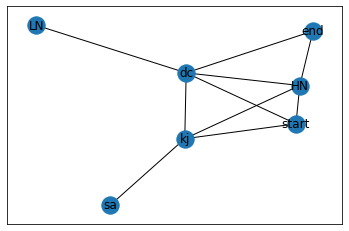

In [20]:
import networkx as nx
G = nx.Graph()
edges = [(x.split('-')[0],x.split('-')[1]) for x in c]
G.add_edges_from(edges)
nx.draw_networkx(G)

In [22]:
all_paths = []

def find_all_paths(G, all_paths, source, target, path=[]):
    local_path = path.copy() # ahhhh this caused me so much pain
    local_path.append(source)
    for n in G.neighbors(source):
        
        if n==target:
            local_path.append(n)
            all_paths.append(local_path)
            local_path.pop()
            continue
             
        if n == 'start':
            continue
                
        if n.isupper() | (n not in local_path):
        
            find_all_paths(G, all_paths, n, target, local_path)
    
    return all_paths

In [23]:
res = find_all_paths(G, all_paths=[], source='start', target='end',path=[])

In [24]:
len(res)

19

In [25]:
res

[['start', 'HN', 'dc'],
 ['start', 'HN', 'dc', 'HN'],
 ['start', 'HN', 'dc', 'HN', 'kj', 'HN'],
 ['start', 'HN', 'dc', 'kj', 'HN'],
 ['start', 'HN'],
 ['start', 'HN', 'kj', 'HN', 'dc'],
 ['start', 'HN', 'kj', 'HN', 'dc', 'HN'],
 ['start', 'HN', 'kj', 'HN'],
 ['start', 'HN', 'kj', 'dc'],
 ['start', 'HN', 'kj', 'dc', 'HN'],
 ['start', 'kj', 'HN', 'dc'],
 ['start', 'kj', 'HN', 'dc', 'HN'],
 ['start', 'kj', 'HN'],
 ['start', 'kj', 'dc'],
 ['start', 'kj', 'dc', 'HN'],
 ['start', 'dc'],
 ['start', 'dc', 'HN'],
 ['start', 'dc', 'HN', 'kj', 'HN'],
 ['start', 'dc', 'kj', 'HN']]

## Part 2

In [68]:
f = open("./data/input12.txt", "r")
c = f.readlines()
c = [x.replace("\n","") for x in c]

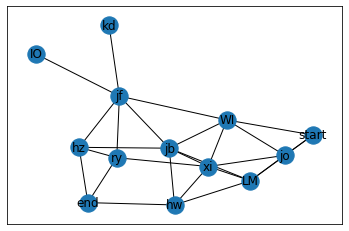

In [69]:
import networkx as nx
G = nx.Graph()
edges = [(x.split('-')[0],x.split('-')[1]) for x in c]
G.add_edges_from(edges)
nx.draw_networkx(G)

In [70]:
from collections import Counter
import numpy as np

1

In [72]:
all_paths = []

def no_small_twice(path):
    local_path = path.copy()
    lower = [x for x in local_path if x.islower() and (not x in ['start','end']) ]
    
    if len(lower) == 0:
        return True
    return np.max(list(Counter(lower).values())) < 2


def find_all_paths(G, all_paths, source, target, path=[]):
    local_path = path.copy() # ahhhh this caused me so much pain
    local_path.append(source)
    
    for n in G.neighbors(source):
        no_small = no_small_twice(local_path)
        
        if n==target:
            local_path.append(n)
            all_paths.append(local_path)
            local_path.pop()
            continue
             
        if n == 'start':
            continue
                
        if (n.isupper()) | (((n  in local_path) & (no_small==True))| (n not in local_path)):
        
            find_all_paths(G, all_paths, n, target, local_path)
    
    return all_paths

In [73]:
res = find_all_paths(G, all_paths=[], source='start', target='end',path=[])

In [74]:
len(res)

155477

# Day 14

## Part 1

In [ ]:
initial_template = "NNCB"
import pandas as pd

In [ ]:
f = open("./data/exmple.txt", "r")
c = f.readlines()
c = [x.replace("\n","") for x in c]

In [ ]:
insertions = pd.DataFrame(c)[0].str.split('->').apply(pd.Series)
insertions[0] = insertions[0].str.strip()
insertions[1] = insertions[1].str.strip()
insertion_dict = insertions.set_index(0).T.to_dict('records')[0]


In [ ]:
def step(views, insertion_dict):
    new_string = []
    for view in views:
        if view not in insertion_dict.keys():
            new_string.append(view[0])
        else:
            letter = insertion_dict[view]
            new_string.append(f"{view[0]}{letter}")
    new_string.append(view[1])
    # print(''.join(new_string))
    return ''.join(new_string)


In [ ]:
template = np.array(list(initial_template))

for i in np.arange(10):
    views = sliding_window_view(template,2)
    views = [''.join(x) for x in views]
    template = step(views, insertion_dict)
    template = np.array(list(template))

In [ ]:
pd.Series(template).value_counts()

In [ ]:
5052-535

# Part 2

# Day 15

## Part 1

In [ ]:
f = open("./data/input15.txt", "r")
c = f.readlines()
c = [x.replace("\n","") for x in c]
arr = pd.DataFrame(c)[0].apply(lambda x: list(x)).apply(pd.Series).astype(int).to_numpy()

In [ ]:
nodes = []
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        nodes.append((i,j))

In [ ]:
len(nodes)

In [ ]:
edges = []
for node in nodes:
    
    adjacent_points = [(node[0], node[1]+1), (node[0], node[1]-1), (node[0]+1, node[1]), (node[0]-1, node[1])]
    for point in adjacent_points:
        if (point[0]>=0) & (point[1]>=0)& (point[1]< arr.shape[1]) & (point[0]< arr.shape[0]):
            edges.append((node, point, arr[point[0], point[1]]))
        
print(len(edges))

In [ ]:
import networkx as nx
import numpy as np
from networkx.algorithms.shortest_paths.weighted import single_source_dijkstra
from networkx.algorithms.shortest_paths.generic import shortest_path
from networkx.algorithms.shortest_paths.weighted import multi_source_dijkstra
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

In [ ]:
sum = 0
shortest = multi_source_dijkstra(G, [(0,0)], (99,99), weight='weight')
shortest[0]


## Part 2

In [ ]:
f = open("./data/input15.txt", "r")
c = f.readlines()
c = [x.replace("\n","") for x in c]
arr = pd.DataFrame(c)[0].apply(lambda x: list(x)).apply(pd.Series).astype(int).to_numpy()

## duplicate map

In [ ]:
extended = []
arr_tmp  = arr.copy()
for i in range(4):
    arr_tmp = arr_tmp+1
    bigger = np.where(arr_tmp>9)
    arr_tmp[bigger] = 1
    extended.append(arr_tmp)
    
row1 = np.concatenate((arr, extended[0], extended[1], extended[2], extended[3]), axis=1)


extended = []
row_tmp  = row1.copy()
for i in range(4):
    row_tmp = row_tmp+1
    bigger = np.where(row_tmp>9)
    row_tmp[bigger] = 1
    extended.append(row_tmp)


full_arr  = np.concatenate((row1, extended[0], extended[1], extended[2], extended[3]), axis=0)
print(full_arr.shape)

In [ ]:
nodes = []
for i in range(full_arr.shape[0]):
    for j in range(full_arr.shape[1]):
        nodes.append((i,j))
print(len(nodes), 'nodes')


edges = []
for node in nodes:
    adjacent_points = [(node[0], node[1]+1), (node[0], node[1]-1), (node[0]+1, node[1]), (node[0]-1, node[1])]
    for point in adjacent_points:
        if (point[0]>=0) & (point[1]>=0)& (point[1]< full_arr.shape[0]) & (point[0]< full_arr.shape[1]):
            edges.append((node, point, full_arr[point[0], point[1]]))
        
print(len(edges), 'edges')

In [ ]:
import networkx as nx
import numpy as np
from networkx.algorithms.shortest_paths.weighted import single_source_dijkstra, single_source_bellman_ford
from networkx.algorithms.shortest_paths.generic import shortest_path
from networkx.algorithms.shortest_paths.weighted import multi_source_dijkstra
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

In [ ]:
shortest = single_source_bellman_ford(G, (0,0), (full_arr.shape[0]-1,full_arr.shape[1]-1), weight='weight')
shortest[0]